Date                     9000
Time                     9000
Water Level in meters    9000
dtype: int64


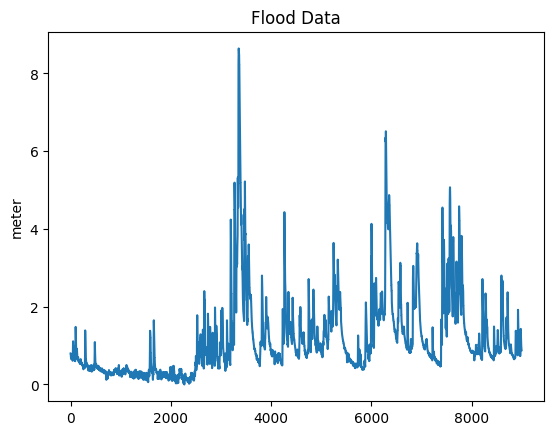

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df= pd.read_csv("dataset/Project_data.csv").head(9000)
df=df[['Date','Time','Water Level in meters']].dropna()
df.head()
plt.plot(df.index,df['Water Level in meters'])
plt.title('Flood Data')
plt.ylabel('meter')
print (df.count())

Text(0, 0.5, 'frequency')

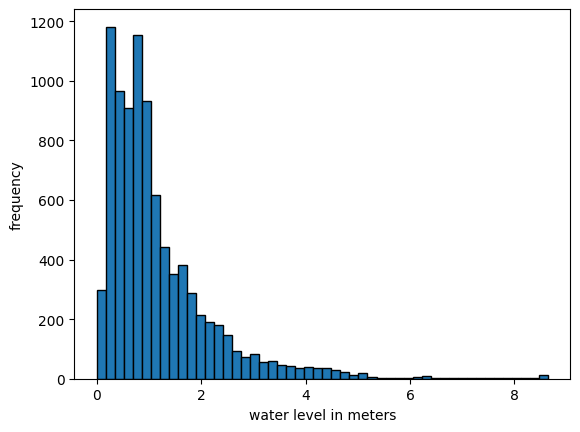

In [28]:
plt.hist(df['Water Level in meters'],bins=50,edgecolor='black')
plt.xlabel("water level in meters")
plt.ylabel("frequency")

BM=  450


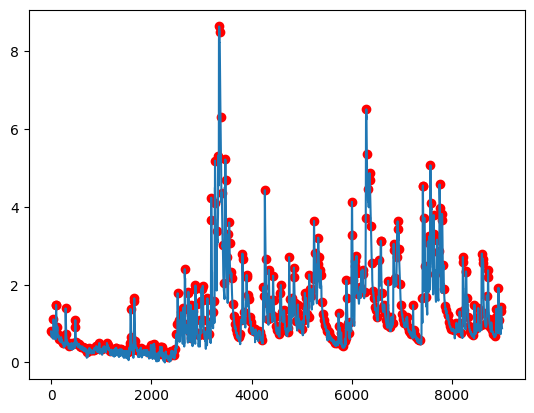

POT= 393


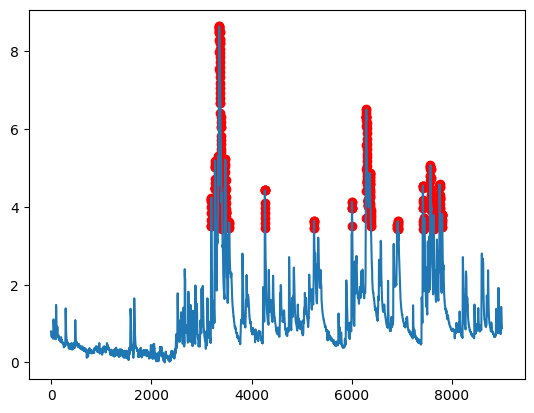

3.4


In [29]:
block_size = 20
block_groups = (df.index - df.index[0]) // block_size
max_indices = df.groupby(block_groups)['Water Level in meters'].idxmax()
extremes_1 = df.loc[max_indices]
print("BM= ", len(extremes_1))
plt.plot(df.index,df['Water Level in meters'])
plt.scatter(extremes_1.index,extremes_1['Water Level in meters'],color='red')
plt.show()
# ///// 

# thr=df['Water Level in meters'].quantile(0.96)
thr=3.4
extremes_2 = df[df['Water Level in meters'] > thr]
print("POT=", len(extremes_2))

plt.plot(df.index,df['Water Level in meters'])
plt.scatter(extremes_2.index,extremes_2['Water Level in meters'],color='red')
plt.show()
print(thr)

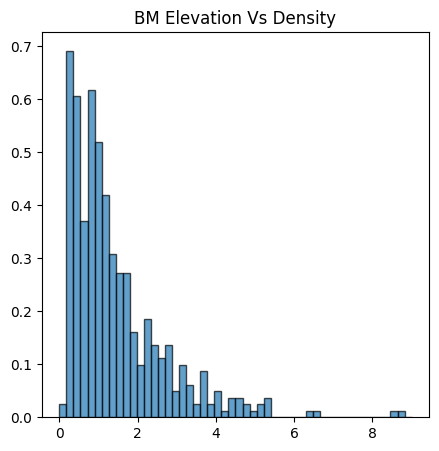

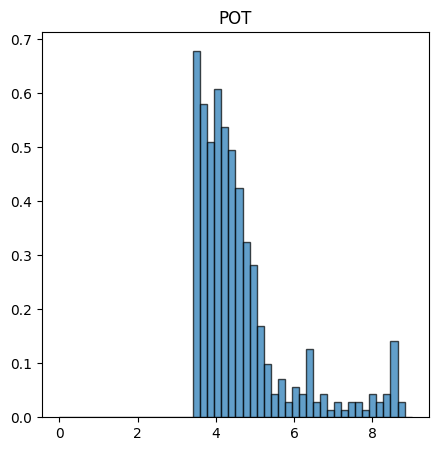

In [30]:
bs=50
plt.figure(figsize=(5, 5))
plt.title("BM Elevation Vs Density")
plt.hist(extremes_1['Water Level in meters'], bins=bs,range=(0,9), density=True,edgecolor='black', alpha=0.7)
plt.show()
plt.figure(figsize=(5, 5))
plt.title("POT")
plt.hist(extremes_2['Water Level in meters'], bins=bs, range=(0,9),density=True,edgecolor='black', alpha=0.7)
plt.show()

C:\Users\Tusha\AppData\Local\Temp\ipykernel_21344\1810415904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extremes_2['exceedance'] = extremes_2['Water Level in meters']-thr


-0.45072741249371795 0.7795545141146407 0.5787831136075723


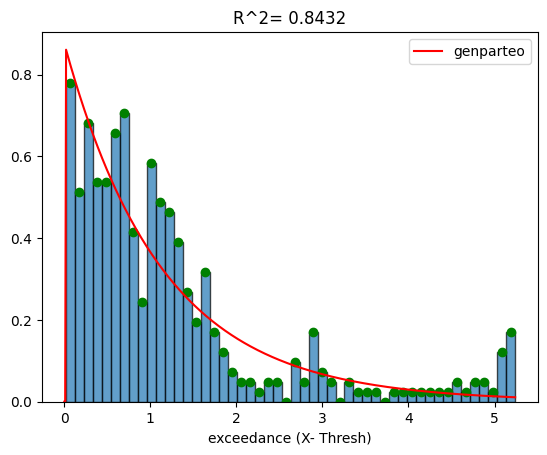

In [39]:
from scipy.stats import weibull_min,expon,genextreme,genpareto,genpareto

extremes_2['exceedance'] = extremes_2['Water Level in meters']-thr
y_obser, bin_edges = np.histogram(extremes_1['Water Level in meters'], bins=bs, density=True)
y_obser2, bin_edges2 = np.histogram(extremes_2['exceedance'], bins=bs, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_centers2 = 0.5 * (bin_edges2[:-1] + bin_edges2[1:])

x_axis= np.linspace(0, extremes_1['Water Level in meters'].max(), 500) 
x_axis2= np.linspace(0, extremes_2['exceedance'].max(), 500) 
c1,l1,s1 = weibull_min.fit(extremes_2['Water Level in meters'])
l2,s2 = expon.fit(extremes_2['Water Level in meters'])
c3,l3,s3 = genextreme.fit(extremes_1['Water Level in meters'])
# extremes_2['exceedance']=extremes_2['Water Level in meters']-thr
c4,l4,s4 = genpareto.fit(extremes_2['exceedance'])

# print(c1,l1,s1)
# print(l2,s2)
print(c3,l3,s3)
# print(c4,l4,s4)

def r2(y_pred, y_obser):
    mean = np.mean(y_obser)
    SSr = np.sum((y_obser - y_pred) ** 2)  # Residual sum of squares
    SSt = np.sum((y_obser - mean) ** 2)    # Total sum of squares
    if SSt == 0:  # Avoid division by zero
        return np.nan
    rsq = 1 - (SSr / SSt)
    return rsq


pdf1= weibull_min.pdf(x_axis,c1,l1,s1)
pdf2= expon.pdf(x_axis,l2,s2)
pdf3= genextreme.pdf(x_axis,c3,l3,s3)
pdf4= genpareto.pdf(x_axis2,c4,l4,s4)
# plt.hist(extremes_1['Water Level in meters'], bins=bs,density=True, edgecolor='black', alpha=0.7)
# plt.scatter(bin_centers,y_obser,color='green')
# plt.plot(x_axis,pdf1,color='red',label='weibull')
# plt.legend()
# pdf1= weibull_min.pdf(bin_centers,c1,l1,s1)
# plt.title(f'R^2= {r2(pdf1,y_obser):.4f}')
# plt.show()
# plt.hist(extremes_1['Water Level in meters'], bins=bs,density=True, edgecolor='black', alpha=0.7)
# plt.scatter(bin_centers,y_obser,color='green')
# plt.plot(x_axis,pdf2,color='blue',label='expon')
# pdf2= expon.pdf(bin_centers,l2,s2)
# plt.title(f"R^2= {r2(pdf2,y_obser):.4f}")
# plt.legend()
# plt.show()
# plt.hist(extremes_1['Water Level in meters'], bins=bs,density=True, edgecolor='black', alpha=0.7)
# plt.scatter(bin_centers,y_obser,color='green')
# plt.plot(x_axis,pdf3,color='green',label='genextreme')
# pdf3= genextreme.pdf(bin_centers,c3,l3,s3)
# plt.title(f'R^2= {r2(pdf3,y_obser):.4f}')
# plt.legend()
# plt.show()
plt.hist(extremes_2['exceedance'], bins=bs,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers2,y_obser2,color='green')
plt.title("POT Exceedancs Vs Density")
plt.plot(x_axis2,pdf4,color='RED',label='genparteo')
plt.xlabel('exceedance (X- Thresh)')
pdf4= genpareto.pdf(bin_centers2,c4,l4,s4)
plt.title(f"R^2= {r2(pdf4,y_obser2):.4f}")
plt.legend()
plt.show()
# pdfs=[pdf1,pdf2,pdf3,pdf4]
# r2s=[]
# for i in pdfs:
#     r2s.append(r2(i,y_obser))
# r2s = np.array(r2s)
# print(f'max r2: {max(r2s):.4f},index {np.argmax(r2s)}')


anual flood rate=  327.105121385998
10 year total flood events=  3271.1
level 4.0m , 43.16% chances of exceedance ,estimated no. of events in 10 year=1412 
level 5.0m , 19.15% chances of exceedance ,estimated no. of events in 10 year=626 
level 6.0m , 8.63% chances of exceedance ,estimated no. of events in 10 year=282 
level 7.0m , 4.00% chances of exceedance ,estimated no. of events in 10 year=131 
level 8.0m , 1.95% chances of exceedance ,estimated no. of events in 10 year=64 


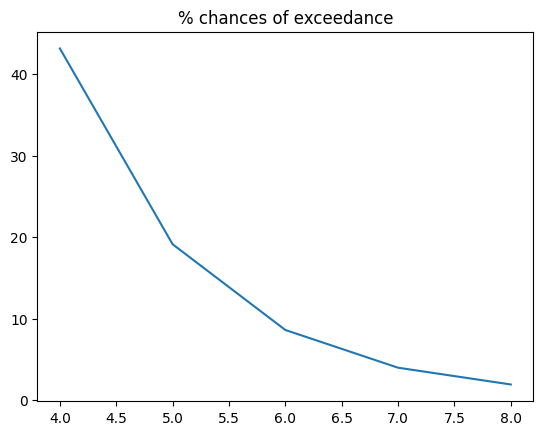

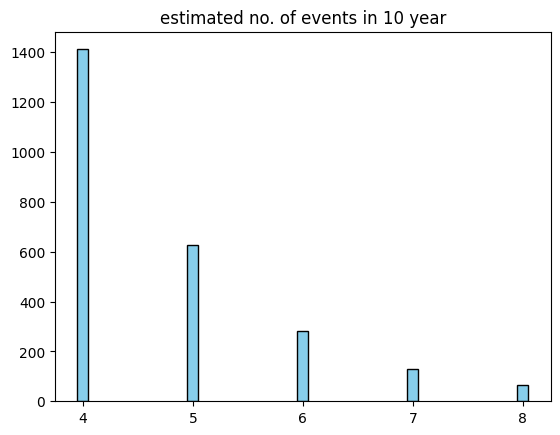

In [32]:
total_Events=df['Water Level in meters'].sum()
anual_flood_rate= ((df['Water Level in meters']>thr).sum())/(total_Events/(24*365))
print ('anual flood rate= ',anual_flood_rate)

ten_year_flood=  anual_flood_rate*10
print ('10 year total flood events= ',round(ten_year_flood,1))

def x_m_flood_prob(X):
    x=np.linspace(X, int (1e3), int (1e4))
    pdf1= weibull_min.pdf(x,c1,l1,s1)
    pdf2= expon.pdf(x,l2,s2)
    pdf3= genextreme.pdf(x,c3,l3,s3)
    i1=np.sum((pdf1[:-1] + pdf1[1:]) * np.diff(x)) / 2
    i2=np.sum((pdf2[:-1] + pdf2[1:]) * np.diff(x)) / 2
    i3=np.sum((pdf3[:-1] + pdf3[1:]) * np.diff(x)) / 2

    return  [i1,i2,i3]

Pred_=np.linspace(4,8, int (5       ))
val=[]
nos=[]
for i in Pred_:
    print(f"level {i:.2}m ,{ (np.mean(x_m_flood_prob(i))*100): .2f}% chances of exceedance ,estimated no. of events in 10 year={(np.mean(x_m_flood_prob(i))*ten_year_flood):.0f} ")
    val.append(np.mean(x_m_flood_prob(i))*100)
    nos.append(round(np.mean(x_m_flood_prob(i))*ten_year_flood,0))


plt.plot(Pred_,val)
plt.title('% chances of exceedance')
plt.show()
plt.bar(Pred_, nos,width=0.1, color='skyblue', edgecolor='black')
plt.title('estimated no. of events in 10 year')

plt.show()

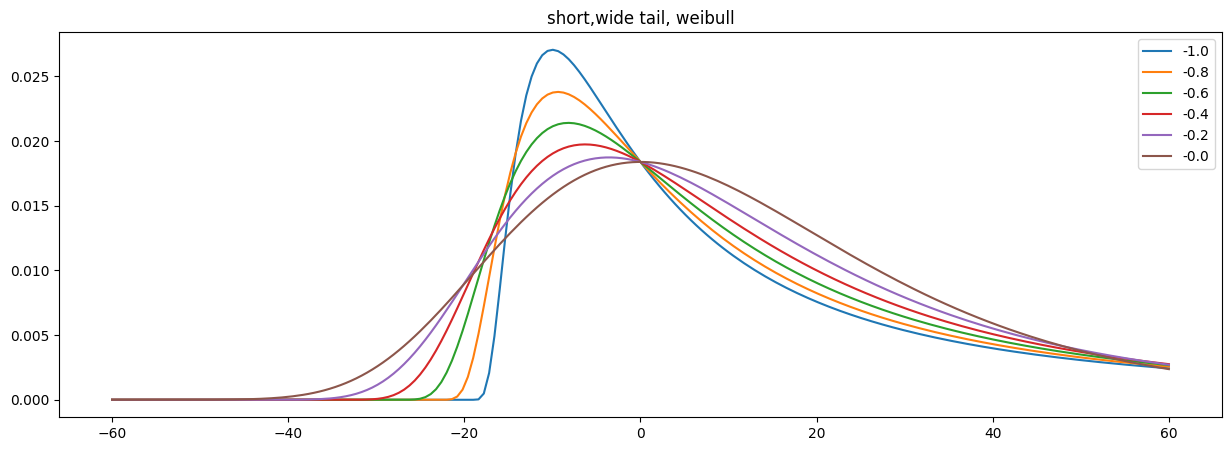

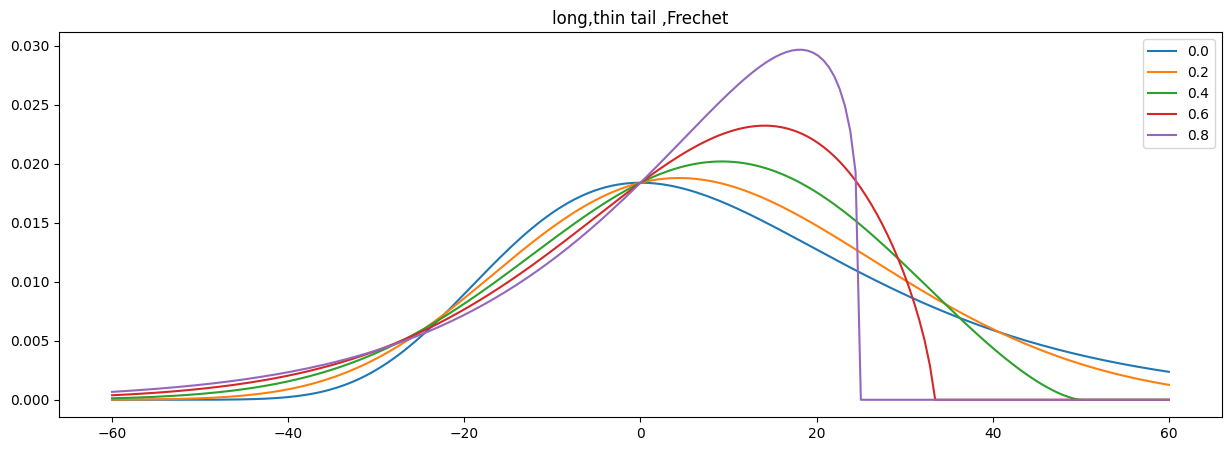

In [33]:
x_axis= np.linspace(-60,60, 200) 
plt.figure(figsize=(15, 5))
plt.title('short,wide tail, weibull')
i=-1
while i<0:
    pdf3= genextreme.pdf(x_axis,i, 0 ,20)
    plt.plot(x_axis,pdf3,label=f'{i:.1f}')
    plt.legend()
    i+=0.2
plt.show()
i=0
plt.figure(figsize=(15, 5))
plt.title('long,thin tail ,Frechet')
while i<1:
    pdf3= genextreme.pdf(x_axis,i, 0 ,20)
    plt.plot(x_axis,pdf3,label=f'{i:.1f}')
    plt.legend()
    i+=0.2
plt.show()

Estimated shape (ξ): -0.0703, scale (σ): 1.2496


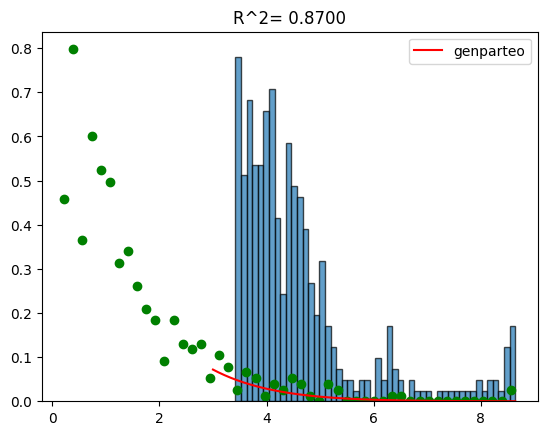

In [34]:
from scipy.optimize import minimize  # Only for optimization (not fitting)

def gpd_log_likelihood(params, data):
    """Compute GPD log-likelihood for shape (xi) and scale (sigma)."""
    xi, sigma = params
    if sigma <= 0:
        return -np.inf  # Penalize invalid parameters
    n = len(data)
    if xi == 0:
        return -n * np.log(sigma) - (1/sigma) * np.sum(data)
    else:
        term = 1 + xi * data / sigma
        if np.any(term <= 0):
            return -np.inf  # Invalid for xi ≠ 0
        return -n * np.log(sigma) - (1/xi + 1) * np.sum(np.log(term))

# Example data (replace with your actual data)
data = df['Water Level in meters']
initial_guess = [0.1, 1.0] 
result = minimize(
    lambda params: -gpd_log_likelihood(params, data),
    initial_guess,
    bounds=[(-0.5, 2), (1e-6, None)]  # xi ∈ (-0.5, 2), sigma > 0
)
xi_hat, sigma_hat = result.x
print(f"Estimated shape (ξ): {xi_hat:.4f}, scale (σ): {sigma_hat:.4f}")
x_axis= np.linspace(3, extremes_2['Water Level in meters'].max(), 500) 

pdf4= genpareto.pdf(x_axis,-0.0779,l4,1.2661)
plt.hist(extremes_2['Water Level in meters'], bins=bs,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')
plt.plot(x_axis,pdf4,color='RED',label='genparteo')
pdf4= genpareto.pdf(bin_centers,c4,l4,s4)
plt.title(f"R^2= {r2(pdf4,y_obser):.4f}")
plt.legend()
plt.show()


In [35]:
print(df['Water Level in meters'].dtype)
print(df['Water Level in meters'].head())

float64
0    0.80
1    0.80
2    0.74
3    0.74
4    0.71
Name: Water Level in meters, dtype: float64


In [56]:
thresh=0
increment=0.05
shape=[]
scale=[]
thresholds=[]
while thresh<10:
    extremes_2= df[df['Water Level in meters'] > thr]
    exceedance=extremes_2['Water Level in meters']-thresh
    s,l,c= genextreme.fit(exceedance)
    c=c+s*thresh #reparameetrized scale 
    shape.append(s)
    scale.append(c)
    thresholds.append(thresh)
    thresh+=increment


0 to 1= 3.965e-05
1 to 2= 3.883e-05
2 to 3= 4.013e-05
3 to 4= 4.033e-05
4 to 5= 3.844e-05
5 to 6= 3.827e-05
6 to 7= 3.813e-05
7 to 8= 3.448e-05
8 to 9= 3.313e-05
9 to 10= 3.345e-05


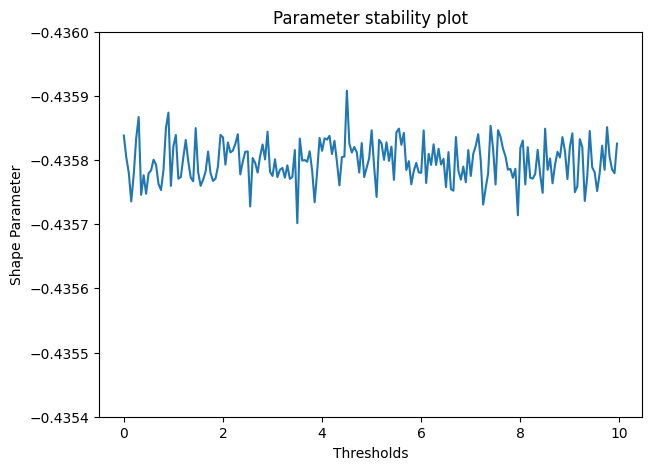

min var=  3.313e-05 interval 10 to 11


In [74]:
plt.figure(figsize=(7, 5))

def varience(x):
    n=len(x)
    mean=sum(x)/n
    return ((1/n)*sum((x-mean)**2))**0.5

i=min(thresholds)
inter_size=1
minvar=1
minint=max(thresholds)
while i<max(thresholds):
    var=varience(shape[i:i+int(inter_size/increment)])
    print(f'{i} to {i+inter_size}= {var:.3e}')
    if var < minvar:
        minvar=var
        minint=i
    i+=inter_size

# plt.title(f'var= {varience(shape):.10f}')
plt.plot(thresholds,shape)
plt.title("Parameter stability plot")
plt.xlabel('Thresholds')
plt.ylabel('Shape Parameter')
plt.ylim(-0.4354,-0.436)

plt.show()
print (f'min var= {minvar: .3e} interval {i} to {i+inter_size}' )
# plt.plot(thresholds,scale)
# plt.show()
# print (shape)


101


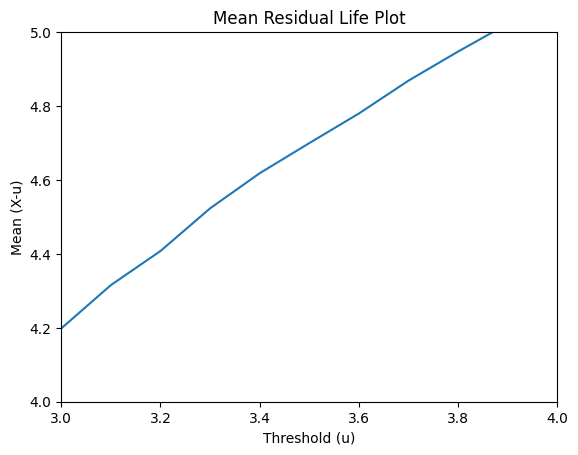

In [81]:
# print (df['Water Level in meters'])
i=0
x=[]
means=[]
while i<10:
    x.append(i)
    means.append(df[df['Water Level in meters']>i]['Water Level in meters'].mean())
    i+=0.1
plt.plot(x,means)
plt.xlim(3,4)
plt.ylim(4,5)
plt.title("Mean Residual Life Plot")
plt.xlabel("Threshold (u)")
plt.ylabel("Mean (X-u)")
print(len(means))

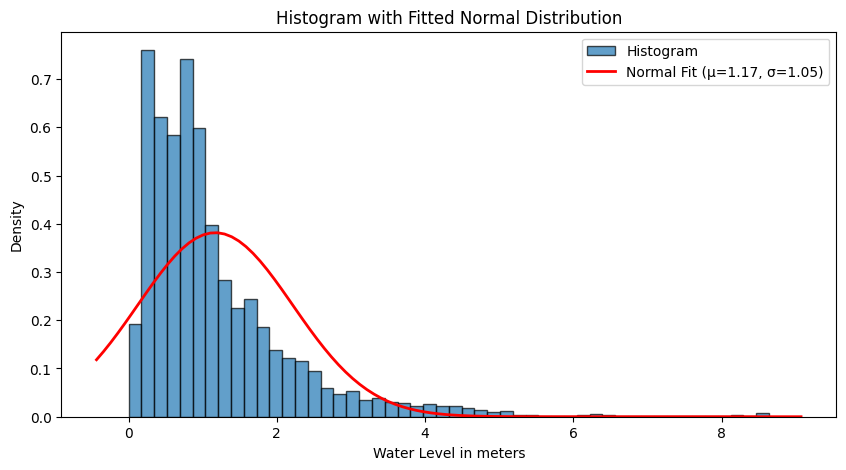

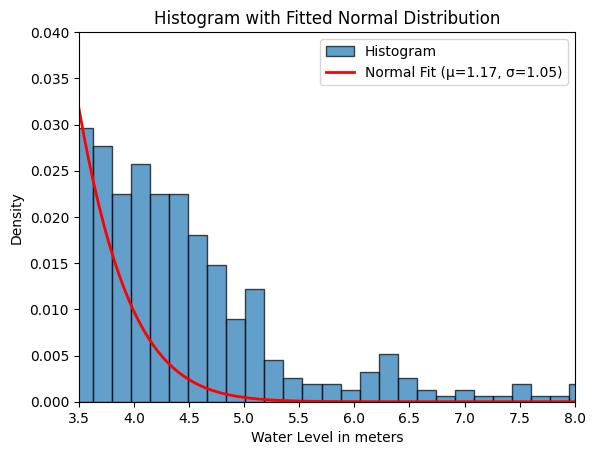

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm  # For normal distribution fitting

# Load and prepare data
df = pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Project_data.csv").head(9000)
df = df[['Date', 'Time', 'Water Level in meters']].dropna()

# # Plot time series (optional)
# plt.figure(figsize=(5,5))
# plt.plot(df.index, df['Water Level in meters'])
# plt.title('Flood Data')
# plt.ylabel('meter')
# plt.show()

# Plot histogram with fitted normal distribution
plt.figure(figsize=(10, 5))
data = df['Water Level in meters']
mean = np.mean(data)
std_dev = np.std(data)

# Plot histogram
plt.hist(data, bins=50, density=True, edgecolor='black', alpha=0.7, label='Histogram')

# Generate normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mean, std_dev)  # Probability Density Function (PDF)

# Plot the fitted normal curve
plt.plot(x, pdf, 'r-', linewidth=2, label=f'Normal Fit (μ={mean:.2f}, σ={std_dev:.2f})')

# Add labels and legend
plt.xlabel("Water Level in meters")
plt.ylabel("Density")
plt.title("Histogram with Fitted Normal Distribution")
plt.legend()
plt.show()

plt.xlim(3.5,8)
plt.ylim(0,0.04)
# Plot histogram
plt.hist(data, bins=50, density=True, edgecolor='black', alpha=0.7, label='Histogram')
# Generate normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mean, std_dev)  # Probability Density Function (PDF)

# Plot the fitted normal curve
plt.plot(x, pdf, 'r-', linewidth=2, label=f'Normal Fit (μ={mean:.2f}, σ={std_dev:.2f})')

# Add labels and legend
plt.xlabel("Water Level in meters")
plt.ylabel("Density")
plt.title("Histogram with Fitted Normal Distribution")
plt.legend()
plt.show()